+ 작성일: 2018-06-15
+ https://www.kaggle.com/c/titanic/data

# 1. Data Load

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# 컬럼별 count 정보 확인
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hedman, Mr. Oskar Arvid",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Age, Cabin, Embarked에 결측값 발견
+ Age: 714
+ Cabin: 204 
+ Embarked:889


In [4]:
#  Pclass, Sex 별로 Age 데이터 보간 
print(df.groupby(['Pclass','Sex'])['Age'].mean())

Pclass1_female = (df['Pclass'] == 1) & (df['Sex'] == 'female')
Pclass1_male = (df['Pclass'] == 1) & (df['Sex'] == 'male')

Pclass2_female = (df['Pclass'] == 2) & (df['Sex'] == 'female')
Pclass2_male = (df['Pclass'] == 2) & (df['Sex'] == 'male')

Pclass3_female = (df['Pclass'] == 3) & (df['Sex'] == 'female')
Pclass3_male = (df['Pclass'] == 3) & (df['Sex'] == 'male')


df.loc[Pclass1_female, 'Age'] = df.loc[Pclass1_female, 'Age'].fillna(df.loc[Pclass1_female, 'Age'].mean())
df.loc[Pclass1_male, 'Age'] = df.loc[Pclass1_male, 'Age'].fillna(df.loc[Pclass1_male, 'Age'].mean())
df.loc[Pclass2_female, 'Age'] = df.loc[Pclass2_female, 'Age'].fillna(df.loc[Pclass2_female, 'Age'].mean())
df.loc[Pclass2_male, 'Age'] = df.loc[Pclass2_male, 'Age'].fillna(df.loc[Pclass2_male, 'Age'].mean())
df.loc[Pclass3_female, 'Age'] = df.loc[Pclass3_female, 'Age'].fillna(df.loc[Pclass3_female, 'Age'].mean())
df.loc[Pclass3_male, 'Age'] = df.loc[Pclass3_male, 'Age'].fillna(df.loc[Pclass3_male, 'Age'].mean())

#df = df.dropna()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


In [5]:
# 파생변수 생성: Title 추출
def get_title(name):
    if ('Mrs' in name):
        return 1
    elif('Mr' in name):
        return 2 
    elif('Miss' in name):
        return 3
    elif('Master' in name):
        return 4
    else:
        return 5
    
df['Title'] = df['Name'].apply(get_title)
df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


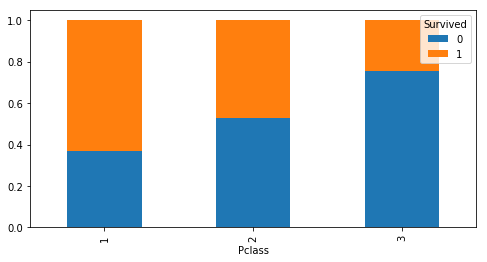

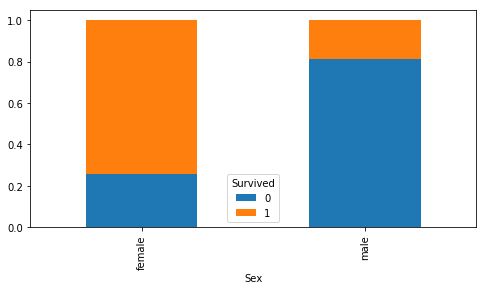

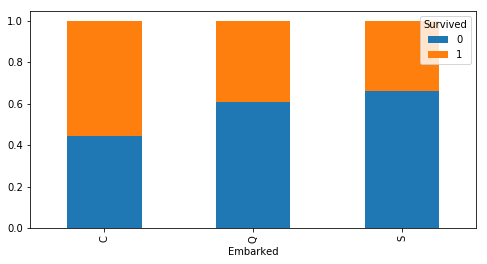

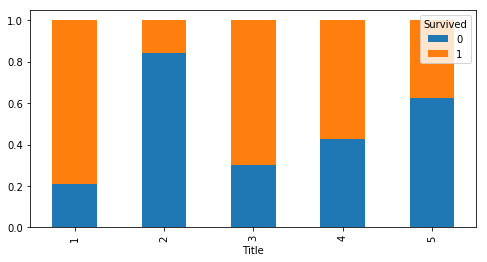

In [6]:
import matplotlib.pyplot as plt
# Category Data 
plt.rcParams["figure.figsize"] = (8,4)
category = 'Pclass'
count_df = pd.crosstab(df[category],df['Survived'])
ratio_df = count_df.divide(count_df.sum(axis = 1), axis=0)
ratio_df.plot(kind='bar', stacked=True)

category = 'Sex'
count_df = pd.crosstab(df[category],df['Survived'])
ratio_df = count_df.divide(count_df.sum(axis = 1), axis=0)
ratio_df.plot(kind='bar', stacked=True)

category = 'Embarked'
count_df = pd.crosstab(df[category],df['Survived'])
ratio_df = count_df.divide(count_df.sum(axis = 1), axis=0)
ratio_df.plot(kind='bar', stacked=True)

category = 'Title'
count_df = pd.crosstab(df[category],df['Survived'])
ratio_df = count_df.divide(count_df.sum(axis = 1), axis=0)
ratio_df.plot(kind='bar', stacked=True)
plt.show()

Cabin은 결측값이 너무 많아 컬럼 제거, 
PassengerID와 Name은 데이터 row의 unique id 이므로 분석에 활용 불가능하여 컬럼 제거 

In [7]:
# 필요없는 컬럼 제거 
column_list = list(df.columns)
column_list.remove('Cabin')
column_list.remove('PassengerId')
column_list.remove('Name')

df = df[column_list]
df = df.dropna()

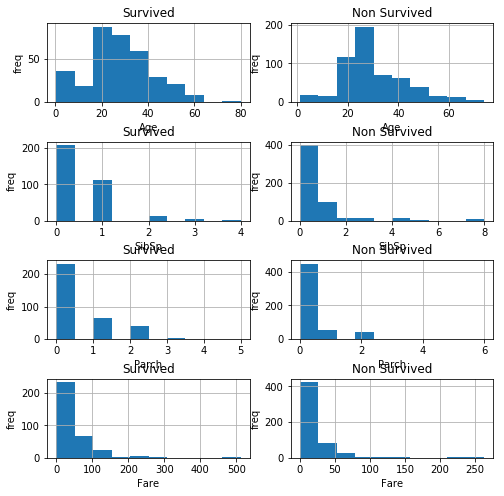

In [8]:
# 생존 사망에 대한 Numeric 데이터 변수의 비중 비교 
plt.rcParams["figure.figsize"] = (8,8)

# Age & Survived 
data = df[df['Survived']==1]['Age']
plt.subplot(421)
plt.xlabel('Age')
plt.ylabel('freq')
plt.hist(data)
plt.title('Survived')
plt.grid(True)


# Age & Non Survived 
data = df[df['Survived']==0]['Age']
plt.subplot(422)
plt.xlabel('Age')
plt.ylabel('freq')
plt.hist(data)
plt.title('Non Survived')
plt.grid(True)


# SibSp & Survived 
data = df[df['Survived']==1]['SibSp']
plt.subplot(423)
plt.xlabel('SibSp')
plt.ylabel('freq')
plt.hist(data)
plt.title('Survived')
plt.grid(True)

# SibSp & Non Survived 
data = df[df['Survived']==0]['SibSp']
plt.subplot(424)
plt.xlabel('SibSp')
plt.ylabel('freq')
plt.hist(data)
plt.title('Non Survived')
plt.grid(True)


# Parch & Survived 
data = df[df['Survived']==1]['Parch']
plt.subplot(425)
plt.xlabel('Parch')
plt.ylabel('freq')
plt.hist(data)
plt.title('Survived')
plt.grid(True)

# Parch & Non Survived 
data = df[df['Survived']==0]['Parch']
plt.subplot(426)
plt.xlabel('Parch')
plt.ylabel('freq')
plt.hist(data)
plt.title('Non Survived')
plt.grid(True)


# Fare & Survived 
data = df[df['Survived']==1]['Fare']
plt.subplot(427)
plt.xlabel('Fare')
plt.ylabel('freq')
plt.hist(data)
plt.title('Survived')
plt.grid(True)

# Fare & Non Survived 
data = df[df['Survived']==0]['Fare']
plt.subplot(428)
plt.xlabel('Fare')
plt.ylabel('freq')
plt.hist(data)
plt.title('Non Survived')
plt.grid(True)


plt.subplots_adjust(hspace = 0.5)
plt.show()

In [9]:
# 컬럼별 count 정보 확인
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889,889.000000,889,889.000000
unique,NaN,NaN,2,NaN,NaN,NaN,680,NaN,3,NaN
top,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,S,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,644,NaN
mean,0.382452,2.311586,NaN,29.272115,0.524184,0.382452,NaN,32.096681,NaN,2.228346
std,0.486260,0.834700,NaN,13.247458,1.103705,0.806761,NaN,49.697504,NaN,0.846725
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,1.000000
25%,0.000000,2.000000,NaN,21.750000,0.000000,0.000000,NaN,7.895800,NaN,2.000000
50%,0.000000,3.000000,NaN,26.507589,0.000000,0.000000,NaN,14.454200,NaN,2.000000
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,NaN,31.000000,NaN,3.000000


# 3. Data Preprocessing
+ 카테고리 데이터: One-Hot Encoding
    + Sex, Ticket, Cabin, Embarked
+ 수치형 데이터: Min-Max Normalization
    + Age, SibSp, Parch, Fare
+ 순위형 데이터
    + Pclass

In [10]:
# 수치형 데이터 전처리: numeric_data
from sklearn.preprocessing import MinMaxScaler

numeric_column_list = ['Age', 'SibSp', 'Parch', 'Fare']
#numeric_column_list = ['Age', 'SibSp', 'Parch']
numeric_data = df[numeric_column_list]
scaler = MinMaxScaler()
scaler.fit(numeric_data)
numeric_data = scaler.transform(numeric_data)

In [11]:
# 카테고리 데이터 전처리: Label Encode -> One Hot Encode
import numpy as np
"""
INPUT : data (category가 포함된 array) 
OUTPUT : onehot_encoded (Label Encoding -> One Hot Encoding 된 array)
"""
def category_encoding(data):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    import numpy as np
    
    label_encoder = LabelEncoder()
    label_encoder.fit_transform(data)
    integer_encoded = label_encoder.fit_transform(data)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    return onehot_encoded

# category encoding: category_data

category_column_list = ['Sex', 'Ticket', 'Embarked', 'Pclass', 'Title']
category_data = df[category_column_list]

Sex_data = category_encoding(category_data['Sex'])
Ticket_data = category_encoding(category_data['Ticket'])
Embarked_data = category_encoding(category_data['Embarked'])
Pclass_data = category_encoding(category_data['Pclass'])
Title_data = category_encoding(category_data['Title'])

#category_data = np.hstack((Sex_data, Ticket_data, Embarked_data, Pclass_data))
category_data = np.hstack((Sex_data, Embarked_data, Pclass_data, Title_data))

In [12]:
# 레이블 데이터 전처리: Label data 
label_data = df['Survived']
label_data = label_data.reshape(len(label_data),1)

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# 데이터 합치기: numeric + category_data + label_data 
total_data = np.hstack((numeric_data, category_data, label_data))

# 4. Split Data

In [14]:
from sklearn.model_selection import train_test_split
target_data = total_data[:,-1]
input_data = total_data[:, :-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)

# 5. Train Model

# 5.1 SVM

In [34]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

score = 'f1'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for f1



C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HSChoi\

Best parameters set found on development set:

{'kernel': 'linear', 'C': 10}

Grid scores on development set:

0.378 (+/-0.001) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1}
0.378 (+/-0.001) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1}
0.768 (+/-0.035) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
0.378 (+/-0.001) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 10}
0.768 (+/-0.043) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 100}
0.768 (+/-0.035) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 100}
0.795 (+/-0.058) for {'kernel': 'linear', 'C': 1}
0.813 (+/-0.059) for {'kernel': 'linear', 'C': 10}
0.811 (+/-0.056) for {'kernel': 'linear', 'C': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.89      0.87      0.88       116
        1.0       0.77      0.81      0.79        62

avg / total       0.85      0.85      0.85       17

# 5.2 Logistic Regression

In [31]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l1', 'l2'],'C': [1, 10, 100, 1000]}]

score = 'f1'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'penalty': 'l2', 'C': 10}

Grid scores on development set:

0.804 (+/-0.045) for {'penalty': 'l1', 'C': 1}
0.806 (+/-0.053) for {'penalty': 'l2', 'C': 1}
0.806 (+/-0.063) for {'penalty': 'l1', 'C': 10}
0.808 (+/-0.059) for {'penalty': 'l2', 'C': 10}
0.806 (+/-0.066) for {'penalty': 'l1', 'C': 100}
0.804 (+/-0.068) for {'penalty': 'l2', 'C': 100}
0.804 (+/-0.068) for {'penalty': 'l1', 'C': 1000}
0.804 (+/-0.068) for {'penalty': 'l2', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.90      0.86      0.88       116
        1.0       0.76      0.82      0.79        62

avg / total       0.85      0.85      0.85       178




# 5.3 Naive Bayes

In [18]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train model 
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_true = y_train

target_names = ['0', '1']
#print(classification_report(y_true, y_pred, target_names=target_names))

#print(accuracy_score(y_true, y_pred))

# 5.4 Random Forest

In [24]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': [2, 4, 8, 10, 12, 16, 32, 64, 128],
                     'max_features': ["auto", "sqrt", "log2", None]}]
    
score = 'f1'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'max_depth': 8, 'max_features': 'auto'}

Grid scores on development set:

0.769 (+/-0.036) for {'max_depth': 2, 'max_features': 'auto'}
0.764 (+/-0.052) for {'max_depth': 2, 'max_features': 'sqrt'}
0.769 (+/-0.046) for {'max_depth': 2, 'max_features': 'log2'}
0.776 (+/-0.060) for {'max_depth': 2, 'max_features': None}
0.795 (+/-0.050) for {'max_depth': 4, 'max_features': 'auto'}
0.789 (+/-0.055) for {'max_depth': 4, 'max_features': 'sqrt'}
0.794 (+/-0.081) for {'max_depth': 4, 'max_features': 'log2'}
0.791 (+/-0.083) for {'max_depth': 4, 'max_features': None}
0.805 (+/-0.066) for {'max_depth': 8, 'max_features': 'auto'}
0.801 (+/-0.081) for {'max_depth': 8, 'max_features': 'sqrt'}
0.803 (+/-0.071) for {'max_depth': 8, 'max_features': 'log2'}
0.789 (+/-0.033) for {'max_depth': 8, 'max_features': None}
0.794 (+/-0.065) for {'max_depth': 10, 'max_features': 'auto'}
0.799 (+/-0.083) for {'max_depth': 10, 'max

## 8.5 Airitificial Neural Network

In [20]:
X_train.shape

(711, 17)

In [27]:
# Paremeter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': [(4), (8), (16), (4, 4), (4, 4, 4), (8, 8), (8, 16), (8, 8, 8), (8, 4, 8)],
                     'alpha': [0.001, 0.01, 0.1, 1]}]
    
score = 'f1'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full developmelnt set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for f1



C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

Best parameters set found on development set:

{'alpha': 0.01, 'hidden_layer_sizes': (8, 16)}

Grid scores on development set:

0.778 (+/-0.054) for {'alpha': 0.001, 'hidden_layer_sizes': 4}
0.801 (+/-0.050) for {'alpha': 0.001, 'hidden_layer_sizes': 8}
0.810 (+/-0.057) for {'alpha': 0.001, 'hidden_layer_sizes': 16}
0.800 (+/-0.078) for {'alpha': 0.001, 'hidden_layer_sizes': (4, 4)}
0.783 (+/-0.053) for {'alpha': 0.001, 'hidden_layer_sizes': (4, 4, 4)}
0.800 (+/-0.064) for {'alpha': 0.001, 'hidden_layer_sizes': (8, 8)}
0.802 (+/-0.059) for {'alpha': 0.001, 'hidden_layer_sizes': (8, 16)}
0.801 (+/-0.051) for {'alpha': 0.001, 'hidden_layer_sizes': (8, 8, 8)}
0.812 (+/-0.062) for {'alpha': 0.001, 'hidden_layer_sizes': (8, 4, 8)}
0.785 (+/-0.050) for {'alpha': 0.01, 'hidden_layer_sizes': 4}
0.811 (+/-0.040) for {'alpha': 0.01, 'hidden_layer_sizes': 8}
0.807 (+/-0.064) for {'alpha': 0.01, 'hidden_layer_sizes': 16}
0.790 (+/-0.070) for {'alpha': 0.01, 'hidden_layer_sizes': (4, 4)}
0.554 (+/-

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
